# Aula 5 : Mapas

#### Material de apoio

- Documentação cartopy: https://scitools.org.uk/cartopy/docs/latest/
- NaturalEarth: conjunto de informações geográficas de acesso público:
    - https://www.naturalearthdata.com/downloads/
    ou
    - https://github.com/nilodna/natural-earth-vector/tree/master/packages/Natural_Earth_quick_start
- OpenStreetMap: iniciativa colaborativa para acesso livre à informações geográficas:
    - https://download.geofabrik.de/south-america/brazil.html

## O que é cartopy?

- processamento de dados geoespaciais
- mapas com alta qualidade
- jornais mundo afora
- controle dos elementos cartográficos

importano o cartopy

```python
import cartopy.crs as ccrs
```

### Criando geofiguras

- criar GeoAxes
- integra matplotlib e cartopy
- utilizando uma projeção
- Duas formas:



In [5]:
# linhas de códigos para evitar Warnings. Uso apenas para apresentações com o RISE para não ocupar espaço demais
# na tela.
import warnings
warnings.filterwarnings('ignore')

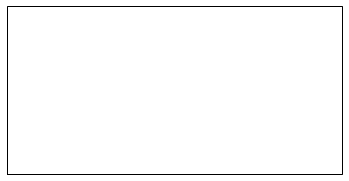

In [1]:
import matplotlib.pyplot as plt
# padrão de importação: crs é o core do pacote
import cartopy.crs as ccrs

%matplotlib inline

# modo 1:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())

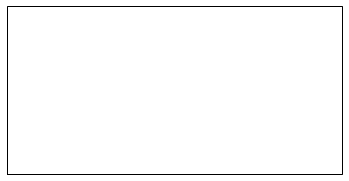

In [2]:
# modo 2:
fig,ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

### Principais métodos

- `ax.coastlines()`: inserir linha de costa
- `ax.set_global()`: ajusta limites geográficos para o globo
- `ax.set_extent()`: ajusta os limites geográficos para uma região
- `ax.stock_img()`: adiciona uma imagem padrão ao mapa
- `ax.imshow()`: adiciona imagem personalizada ao mapa
- `ax.add_geometries()`: adiciona geometrias do shapely (pacote de leitura de shapefiles)
- `ax.gridlines()`: adiciona linhas de grade associadas às coordenadas

In [3]:
# Podemos criar uma função para retornar um mapa

def create_map(projection):
    fig,ax = plt.subplots(subplot_kw={'projection': projection})
    
    return fig,ax

/home/luiza/miniconda3/envs/python3/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


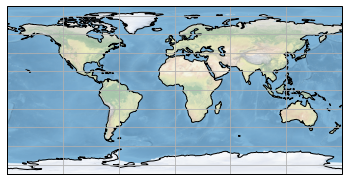

In [4]:
proj = ccrs.PlateCarree()

fig,ax = create_map(proj)

# adicionando linha de costa
ax.coastlines()

# adicionando gridline
ax.gridlines()

# adicionando imagem padrão
ax.stock_img()

### Projeção de mapas: problemas

- Terra não é plana
- projetar esfera em plano: distorção

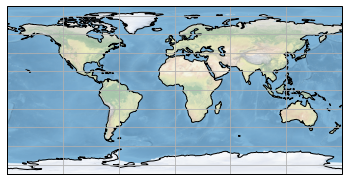

In [6]:
# Robinson, Mercator, Orthographic, InterruptedGoodeHomolosine

fig,ax = create_map(ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines()

### Criando um mapa regional

- área de estudo
- mapa da PCSE
- Unidade de Conservação do Arquipélago de Alcatrazes (ICMBio) 

In [13]:
import numpy as np
# importando diversos pacotes novos
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
# pacotes relacionados às funcionalidades do cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

#### Primeiros passos

- determinar projeção
- limites geográficos
- google maps para auxiliar
    - canto inferior esquerdo
    - canto superior direito



In [8]:
# projecao
proj = ccrs.PlateCarree()

# posicao do canto inferior esquerdo
lower_lon = -50
lower_lat = -30

# posicao do canto superior direito
upper_lon = -41
upper_lat = -22

### Linha de costa

- padrão: NaturalEarth (1cm:10m)
- download feito automaticamente
- demora, mas depois fica rápido
- para mais conjuntos, visite: Natural Earth

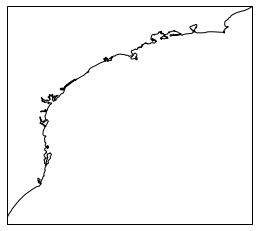

In [9]:
# montando uma lista para facilitar enviar para o GeoAxes os limites geográficos. 
extent = [lower_lon, upper_lon, lower_lat, upper_lat]
# criando mapa com a função 
fig,ax = create_map(ccrs.PlateCarree())
# alterando para os limites criados acima
ax.set_extent(extent)
# inserindo linha de costa com resolução de 1:110, teste com 10m e 50m
ax.coastlines('10m')

Dentre os conjuntos do NaturalEarth, podemos ainda utilizar:

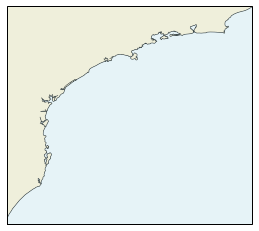

In [10]:
import cartopy.feature as cfeature

fig,ax = create_map(ccrs.PlateCarree())
ax.set_extent(extent)
ax.coastlines('10m')

coastline_10m = cfeature.NaturalEarthFeature(
    category='physical',name='coastline',scale='10m',
    facecolor=cfeature.COLORS['land'])

bathy_0m      = cfeature.NaturalEarthFeature(category='physical',name='bathymetry_L_0',scale='10m')

# inserting information over the map
ax.add_feature(coastline_10m, edgecolor='black', linewidth=.05)
ax.add_feature(bathy_0m, facecolor='lightblue', alpha=.3)

criando uma função para auxiliar:

In [11]:
def make_map(fig=None, ax=None, extent=[-50,-41,-30,-22], projection=ccrs.PlateCarree()):
    """ 
    documente-a como exercício para entender a 
    ação de cada linha
    """
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    coastline_10m = cfeature.NaturalEarthFeature(
        category='physical',name='coastline',scale='10m',
        facecolor=cfeature.COLORS['land'])

    bathy_0m      = cfeature.NaturalEarthFeature(
        category='physical',name='bathymetry_L_0',scale='10m')

    # inserting information over the map
    ax.add_feature(coastline_10m, 
                   edgecolor='black',
                   linewidth=.1)
    ax.add_feature(bathy_0m,
                   facecolor='lightblue',
                   alpha=.3)
    
    return ax

Meridianos e Paralelos como grids

- .gridlines()
- limites geográficos como referência
- customizar: grossura, cor, transparencia, etc ...- 

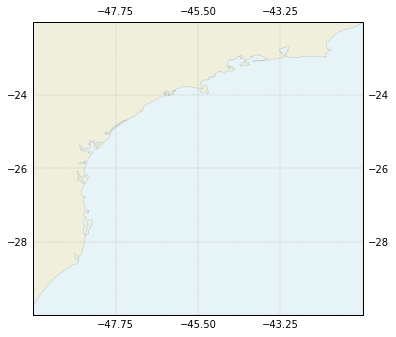

In [14]:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())

# criando as gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.4, color='gray', 
                  alpha=0.5, linestyle='--', 
                  xlocs=np.linspace(extent[0], extent[1], 5),
                  ylocs=np.linspace(extent[3], extent[2], 5))

Rótulos aparecem ao redor de todo o mapa, mas podemos customizar isso também!

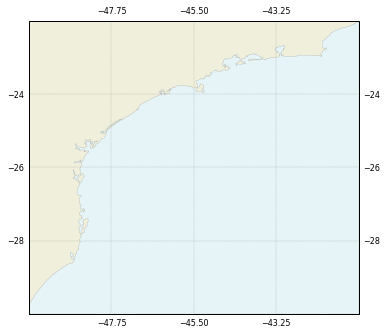

In [15]:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())

# criando as gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.4, color='gray', 
                  alpha=0.5, linestyle='--', 
                  xlocs=np.linspace(extent[0], extent[1], 5),
                  ylocs=np.linspace(extent[3], extent[2], 5))

gl.top_labels = False
gl.right_labels = False

# dicionario com configurações dos rótulos
dict_style_labels = {'color': 'black', 'fontsize': 8}

gl.ylabel_style = dict_style_labels
gl.xlabel_style = dict_style_labels

Vamos criar uma segunda função, para configurar o mapa em termo de meridianos e paralelos:

In [16]:
def configuring_map(ax, extent):
    # criando as gridlines 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.4, color='gray', 
                      alpha=0.5, linestyle='--', 
                      xlocs=np.linspace(extent[0], extent[1], 5),
                      ylocs=np.linspace(extent[3], extent[2], 5))

    gl.top_labels = False
    gl.right_labels = False

    # dicionario com configurações dos rótulos
    dict_style_labels = {
        'color': 'black',
        'fontsize': 8
    }

    gl.ylabel_style = dict_style_labels

Notem que:

- duas funções capazes de criar um mapa para qualquer lugar no globo
- podemos começar a pensar em criar nossas próprias coleções de funções, para não nos repetirmos!


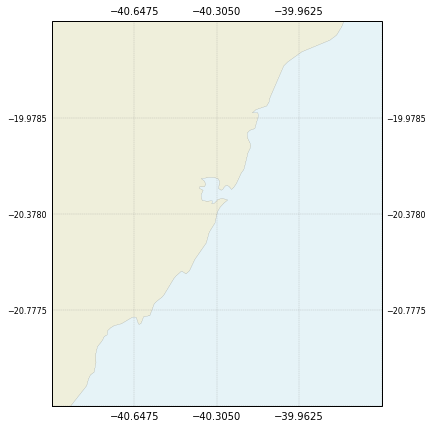

In [17]:
# mapa Espirito Santo (centrado em Vitória)
lower = [-40.99, -21.177]
upper = [-39.62, -19.579]
extent2 = [lower[0], upper[0], lower[1], upper[1]]

fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax = make_map(fig=fig, ax=ax, extent=extent2, projection=ccrs.PlateCarree())
configuring_map(ax, extent=extent2)

Unidade de Conservação

- estabelecer limites geográficos para criar minimapa
- inserir polígono indicando aonde iremos dar zoom no mapa

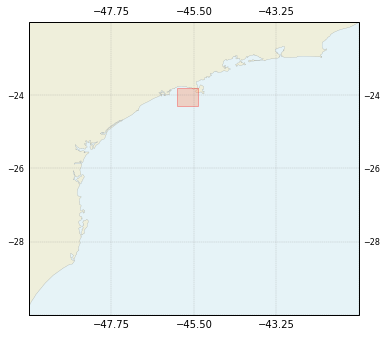

In [18]:
# coordenadas geográficas do limite do minimapa
lower = [-24.3, -45.949]
upper = [-23.8, -45.4]
extent_UC = [lower[1], upper[1], lower[0], upper[0]]
# usando um método novo do matplotlib, criamos um polígono

extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])

# plotando mapa
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
_ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência

Inserindo minimapa

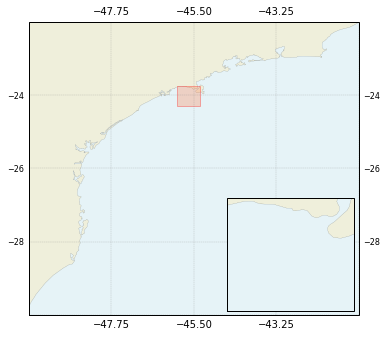

In [19]:
# coordenadas geográficas do limite do minimapa
lower,upper = [-24.3, -45.949], [-23.74, -45.32]
extent_UC = [lower[1], upper[1], lower[0], upper[0]]
# usando um método novo do matplotlib, criamos um polígono
extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])
# plotando mapa
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
_ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência
# setting axes position and size
left,bottom   = 0.465, 0.25
width, height  = 0.55, 0.20
rect = [left,bottom,width,height]

# creating axes 2 for minimap
ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)

plt.savefig('tmp_map.png', dpi=150)

### Lendo shapefiles com cartopy.shapereader

- requisitos: shapely

In [20]:

def criando_mapa(extent):
    # coordenadas geográficas do limite do minimapa
    lower = [-24.3, -45.949]
    upper = [-23.74, -45.32]
    extent_UC = [lower[1], upper[1], lower[0], upper[0]]
    # usando um método novo do matplotlib, criamos um polígono
    extent_box = sgeom.box(extent_UC[0], extent_UC[2], extent_UC[1], extent_UC[3])
    
    # plotando mapa
    fig = plt.figure(figsize=(15/2.54,20/2.54))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
    configuring_map(ax, extent)
    _ = ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                          facecolor='coral', # cor do polígono
                          edgecolor='red',   # cor das arestas
                          alpha=.3)          # transparência

    # setting axes position and size
    left,bottom   = 0.465, 0.25
    width, height  = 0.55, 0.20
    rect = [left,bottom,width,height]

    # creating axes 2 for minimap
    ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
    ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)
    
    return fig,ax,ax2


In [50]:
# execute a linha de comando abaixo para fazer download do conjunto de dados que serão utilizados
!wget --directory-prefix=../dados/OSM/OSM_BRA_coastline/ https://github.com/LuizaPS/MinicursoPython_AbmGeo/tree/main/Dados/OSM/OSM_BRA_coastline/lines.shp

--2021-11-26 10:54:39--  https://github.com/LuizaPS/MinicursoPython_AbmGeo/tree/main/Dados/OSM/OSM_BRA_coastline/lines.shp
Resolvendo github.com (github.com)... 20.201.28.151
Conectando-se a github.com (github.com)|20.201.28.151|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: https://github.com/LuizaPS/MinicursoPython_AbmGeo/blob/main/Dados/OSM/OSM_BRA_coastline/lines.shp [redirecionando]
--2021-11-26 10:54:40--  https://github.com/LuizaPS/MinicursoPython_AbmGeo/blob/main/Dados/OSM/OSM_BRA_coastline/lines.shp
Reaproveitando a conexão existente para github.com:443.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: não especificada [text/html]
Salvando em: “../dados/OSM/OSM_BRA_coastline/lines.shp”

lines.shp               [ <=>                ] 159,01K  --.-KB/s    em 0,06s   

2021-11-26 10:54:40 (2,45 MB/s) - “../dados/OSM/OSM_BRA_coastline/lines.shp” salvo [162831]



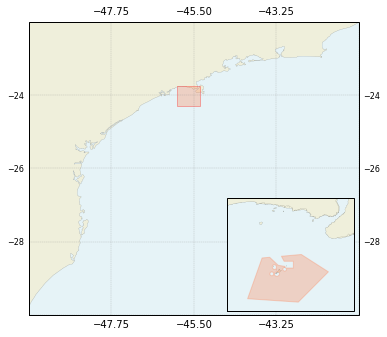

In [44]:
# criei uma função temporaria para facilitar a visualização
fig,ax,ax2 = criando_mapa(extent)

# adicionando linha de costa do OpenStreetMap
line = shpreader.Reader('../Dados/OSM/OSM_BRA_coastline/lines.shp')
ax2.add_geometries(line.geometries(), ccrs.PlateCarree(), facecolor='none',edgecolor='black',linewidth=.05)

# adicionando continente do OpenStreetMap
land = shpreader.Reader('../Dados/OSM/OSM_BRA_land/land.shp')
ax2.add_geometries(land.geometries(), ccrs.PlateCarree(),facecolor=cfeature.COLORS['land'],edgecolor='black',linewidth=0.05)

# adicionando área da unidade de conservação (terra e água)
ucs = shpreader.Reader('../Dados/alcatrazes/alcatrazes.shp')
ax2.add_geometries(ucs.geometries(), ccrs.PlateCarree(),facecolor='coral',alpha=.3,edgecolor='coral')

plt.savefig('tmp_map.png', dpi=150)

Como temos tudo elaborado, transformei o bloco de códigos para inserir o minimapa de Alcatrazes em uma função que chamei de: create_alcatrazes(ax) para facilitar.

In [47]:


def create_alcatrazes(ax):

    # coordenadas geográficas do limite do minimapa
    lower_lat = -24.3
    lower_lon = -45.949
    upper_lat = -23.74
    upper_lon = -45.32

    extent_UC = [lower_lon, upper_lon, lower_lat, upper_lat]

    # usando um método novo do matplotlib, criamos um polígono
    extent_box = sgeom.box(extent_UC[0], extent_UC[2], 
                           extent_UC[1], extent_UC[3])

    # adicionando polígono no mapa
    ax.add_geometries([extent_box], ccrs.PlateCarree(), 
                      facecolor='coral', # cor do polígono
                      edgecolor='red',   # cor das arestas
                      alpha=.3)          # transparência

    # setting axes position and size
    left   = 0.465
    bottom = 0.25
    width  = 0.55
    height = 0.20

    rect = [left,bottom,width,height]

    # creating axes 2 for minimap
    ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
    ax2 = make_map(fig=fig, ax=ax2, extent=extent_UC)

    # adicionando linha de costa do OpenStreetMap
    line = shpreader.Reader('../Dados/OSM/OSM_BRA_coastline/lines.shp')
    ax2.add_geometries(line.geometries(), ccrs.PlateCarree(),facecolor='none',edgecolor='black',linewidth=.05)

    # adicionando continente do OpenStreetMap
    land = shpreader.Reader('../Dados/OSM/OSM_BRA_land/land.shp')
    ax2.add_geometries(land.geometries(), ccrs.PlateCarree(),facecolor=cfeature.COLORS['land'],edgecolor='black',linewidth=0.05)

    # adicionando área da unidade de conservação (terra e água)
    ucs = shpreader.Reader('../Dados/alcatrazes/alcatrazes.shp')
    ax2.add_geometries(ucs.geometries(), ccrs.PlateCarree(),facecolor='coral',alpha=.3,edgecolor='coral')
    
    return ax2



Inserindo localizações com scatter

- dicionário com informações para plotar
- estações meteorológicas, fundeios, etc 

In [48]:
# criando dicionário com os locais e metadados

insitu = {
    'simcosta-css': {
        'coords': (-23.831, -45.423), # lat,lon
        'marker': 's',
        'color': 'purple',
        'label': 'SiMCosta - SP',
        'minimap': True # plotar no minimapa?
    },
    
    'simcosta-rj': {
        'coords': (-22.967, -43.131),
        'marker': 's',
        'color': 'green',
        'label': 'SiMCosta - RJ',
        'minimap': False
    },
    
    'base-ubatuba': {
        'coords': (-23.499, -45.119),
        'marker': 'o',
        'color': 'k',
        'label': 'Base Ubatuba (IOUSP)',
        'minimap': False
        
    },
    'base-cananeia': {
        'coords': (-25.02, -47.925),
        'marker': 'o',
        'color': 'r',
        'label': u'Base Cananéia (IOUSP)',
        'minimap': False
    }
}


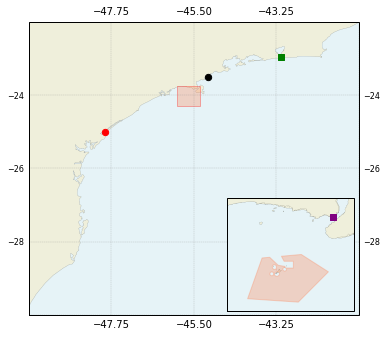

In [49]:
# código completo
# projecao
proj = ccrs.PlateCarree()
lower_lon, lower_lat = -50, -30
upper_lon, upper_lat = -41, -22
extent = [lower_lon, upper_lon, lower_lat, upper_lat]
# criando a base do mapa:
fig = plt.figure(figsize=(15/2.54,20/2.54))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = make_map(fig=fig, ax=ax, extent=extent, projection=ccrs.PlateCarree())
configuring_map(ax, extent)
# inserindo o minimapa completo
ax2 = create_alcatrazes(ax)

# inserindo marcadores de pontos de observação
for local,metadados in insitu.items():
    # extraindo metadados
    lat,lon = metadados['coords']
    marker = metadados['marker']
    color = metadados['color']
    label = metadados['label']
    
    # varia o ax_plot de acordo com o mapa que deve exibir a informação
    if metadados['minimap']:
        ax_plot = ax2
    else:
        ax_plot = ax
        
    ax_plot.scatter(lon, lat, s=40, marker=marker, color=color, label=label, zorder=50)

plt.savefig('mapa_alcatrazes.png', dpi=150)